#Kaggle 
##Titanic - Machine Learning from Disaster
##Por: José Guarnizo
https://www.kaggle.com/c/titanic



In [ ]:
pip install category_encoders

     |████████████████████████████████| 86 kB 3.2 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import category_encoders as ce
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Lectura del archivo train
df=pd.read_csv("https://raw.githubusercontent.com/JGuarnizo/Coding_Dojo/main/Advanced_Machine_Learning/Week10_Gradient_Boosting/titanic_train.csv")
df=df.drop(columns=["PassengerId","Name","Cabin", "Ticket"])
df.Embarked=df.Embarked.fillna("S")
df.Age=df.Age.fillna(df.Age.median())
#Lectura del archivo test
df2=pd.read_csv("https://raw.githubusercontent.com/JGuarnizo/Coding_Dojo/main/Advanced_Machine_Learning/Week10_Gradient_Boosting/titanic_test.csv")
df2=df2.drop(columns=["PassengerId","Name","Cabin","Ticket"])
df2.Fare=df2.Fare.fillna(df2.Fare.median())
df2.Age=df2.Age.fillna(df2.Age.median())

In [ ]:
X=df.drop(columns="Survived")
y=df.Survived.values
#Dummies para archivo train
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X = ohe.fit_transform(X)

#Dummies para archivo test
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
df2 = ohe.fit_transform(df2)
#Split_Train_Test del archivo train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35 ,random_state=8)

#Escalado de datos
Scaler=StandardScaler()
Scaler.fit(X_train)
X_train=Scaler.transform(X_train)
X_test=Scaler.transform(X_test)
df3=Scaler.transform(df2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
model = Sequential()
model.add(Dense(20, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(10,activation = 'relu')) 
model.add(Dropout(.2))
model.add(Dense(5,activation = 'relu')) 
model.add(Dropout(.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history=model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100)

Epoch 1/100
19/19 [==============================] - 2s 39ms/step - loss: 0.6790 - val_loss: 0.6534
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6526 - val_loss: 0.6388
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 0.6355 - val_loss: 0.6192
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 0.6077 - val_loss: 0.5956
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6063 - val_loss: 0.5752
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5883 - val_loss: 0.5560
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 0.5691 - val_loss: 0.5361
Epoch 8/100
19/19 [==============================] - 0s 12ms/step - loss: 0.5612 - val_loss: 0.5192
Epoch 9/100
19/19 [==============================] - 0s 8ms/step - loss: 0.5464 - val_loss: 0.5036
Epoch 10/100
19/19 [==============================] - 0s 11ms/step - loss: 0.5415 - val_loss: 0.4893
Epoch

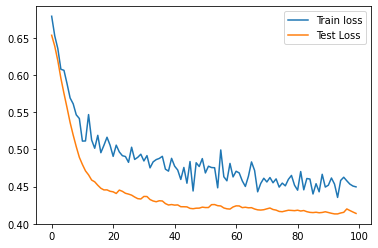

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
#Predicciones del modelo 
result=model.predict(df3)
result=result.ravel()
result=result.round()

In [ ]:
data=[]
indice = 892
for i in range(0,418):
  data.append([indice,int(result[i])])
  indice+=1

dp=pd.DataFrame(data, columns=['PassengerId','Survived'])
dp.to_csv(path_or_buf='Resultado_Titanic_RN.csv', index=False)